In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv('Mock_Betting_Dataset__with_User_Profile_Data_.csv')
data.head()
data['Gender'] = data['Gender'].replace('Non-binary', 'Female')

In [3]:
# GENERAL EDA
print('SHAPE OF DATA:', data.shape)
print('---------------------------')
print(data.describe())
print('---------------------------')
print(data.info())
print('---------------------------')
print(data.dtypes)

SHAPE OF DATA: (500, 12)
---------------------------
           Amount     Outcome  Time Spent (min)         Age
count  500.000000  500.000000         500.00000  500.000000
mean   252.955160    0.508000           7.91244   40.690000
std    141.209797    0.500437           4.02752   13.185204
min     10.320000    0.000000           1.00000   22.000000
25%    132.870000    0.000000           4.37500   28.000000
50%    253.480000    1.000000           7.62500   41.000000
75%    373.017500    1.000000          11.36000   50.000000
max    498.530000    1.000000          14.93000   64.000000
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User ID             500 non-null    object 
 1   Bet Type            500 non-null    object 
 2   Amount              500 non-null    float64
 3   Outcome             500 

- User ID(OBJECT): Distinct User ID for customer.
- Bet Type(OBJECT): Type of bet placed.
- Amount(FLOAT): Average amount spent is $252 with a large variance in that amount. The minimum bet placed was $10 and the maximum was $498. 50% of the data is between $132  and $373.
- Outcome(INT): Boolean value suggesting if the bet won or not. 1 = bettor won, 0 = better lost.
- Timestamp(OBJECT: CHANGE): Time active on the site
- Time Spent (min)(FLOAT): Time spent on app
- Page(OBJECT): Page the user was currently on
- Sport(OBJECT): type of sport the bet was placed on
- Age(INT): Age of user
- Gender(OBJECT): Gender of User
- Betting Preference(OBJECT): Type of betting style the users prefers
- Engagement Level(OBJECT): How active the user is on this site

In [4]:
# Converting Timestamp column to datetime
data['Timestamp']= pd.to_datetime(data['Timestamp'])

User ID:
    - There are 10 total users
    - User 9 is the least active
    - User 7 is the most active

The Bet Types are:
- Prop Bet (Most)
 - Parlay
 - Point Spread 
- Monyline
 - Over/Under (Least)

In [5]:
data.head()

,User ID,Bet Type,Amount,Outcome,Timestamp,Time Spent (min),Page,Sport,Age,Gender,Betting Preference,Engagement Level
0,User_8,Parlay,32.20,0,2024-08-04 14:56:35.578821,4.72,Bet Slip,Basketball,22,Female,High Risk,Medium
1,User_9,Moneyline,84.83,1,2024-08-04 03:49:16.578821,2.09,Sports Page,Soccer,47,Female,Favorite Teams,High
2,User_10,Parlay,67.35,1,2024-08-04 01:59:38.578821,2.57,Sports Page,Baseball,29,Male,Player Props,Medium
3,User_6,Moneyline,416.40,0,2024-08-24 11:31:22.578821,3.36,Homepage,Basketball,41,Male,Favorite Teams,Medium
4,User_4,Over/Under,316.87,0,2024-08-18 09:46:03.578821,12.04,Homepage,Football,50,Male,Favorite Teams,Medium


The pages on the website are:
- Homepage: main page of the platform. Where users arrive first
- Sports Page: specific page dedicated to each sport
- Bet Slip: Where users finalize their bets
- Statistics Page: detailed information on upcoming teams/events
- Live Betting: Where users can place live bets on 

Spread on User ID
User_7     58
User_1     56
User_2     52
User_5     51
User_8     49
User_10    49
User_3     49
User_4     48
User_6     46
User_9     42
Name: count, dtype: int64
---------------------------


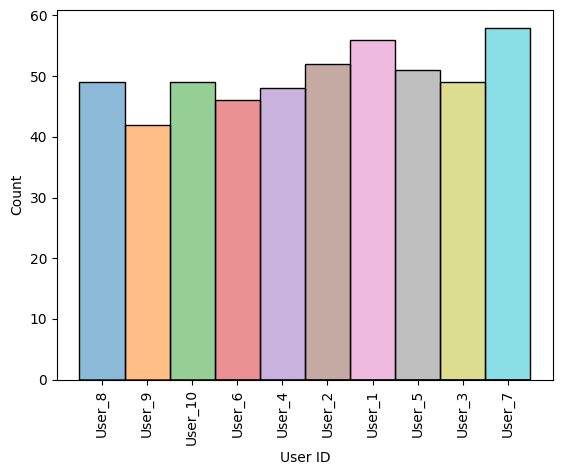

---------------------------
Spread on Bet Type
Prop Bet        109
Parlay          106
Point Spread    102
Moneyline        92
Over/Under       91
Name: count, dtype: int64
---------------------------


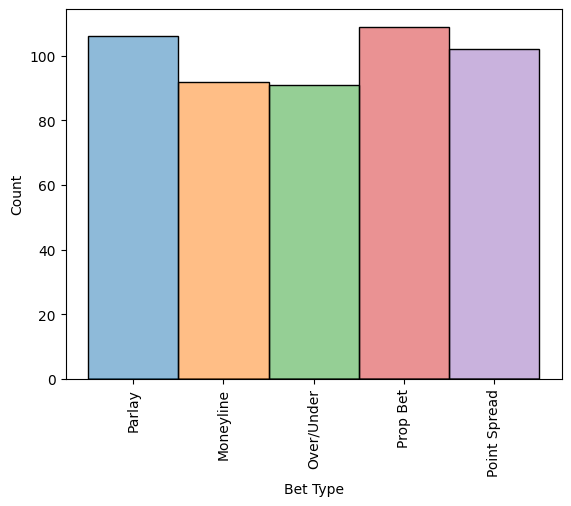

---------------------------
Spread on Page
Bet Slip           114
Statistics Page    101
Sports Page         97
Live Betting        96
Homepage            92
Name: count, dtype: int64
---------------------------


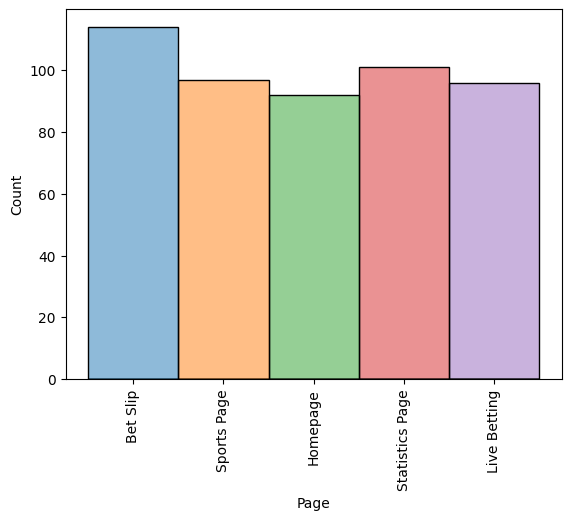

---------------------------
Spread on Sport
Football      99
Baseball      88
Basketball    87
Hockey        83
Soccer        80
Tennis        63
Name: count, dtype: int64
---------------------------


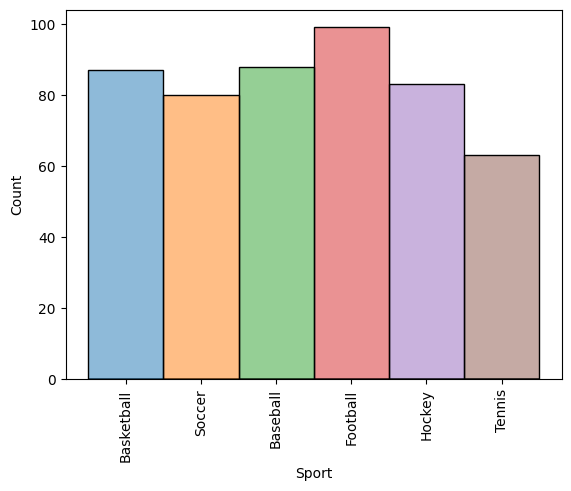

---------------------------
Spread on Gender
Male      299
Female    201
Name: count, dtype: int64
---------------------------


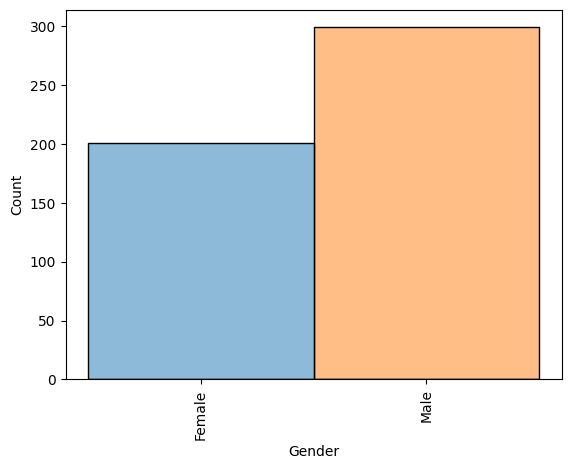

---------------------------
Spread on Betting Preference
Favorite Teams    295
Underdogs          58
High Risk          49
Player Props       49
Low Risk           49
Name: count, dtype: int64
---------------------------


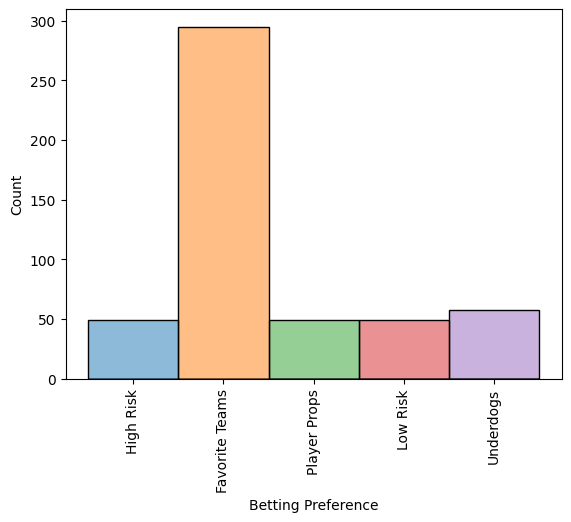

---------------------------
Spread on Engagement Level
High      308
Medium    192
Name: count, dtype: int64
---------------------------


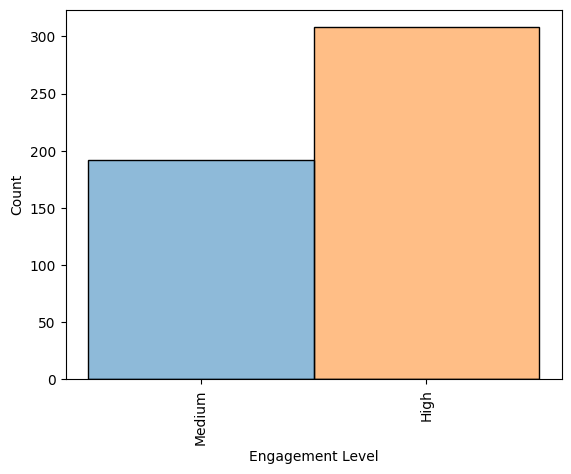

---------------------------


In [6]:
# General eda on categorical variables

cat = data[['User ID', 'Bet Type', 'Page', 'Sport', 'Gender', 'Betting Preference', 'Engagement Level']]

for i, col in enumerate(cat.columns):
    print("Spread on", data[col].value_counts())
    print('---------------------------')
    sns.histplot(data, x = col, hue = col, legend=False)
    plt.xticks(rotation=90)
    plt.show()
    print('---------------------------')


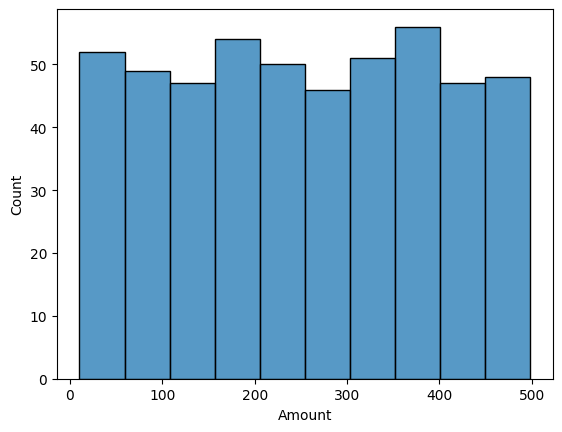

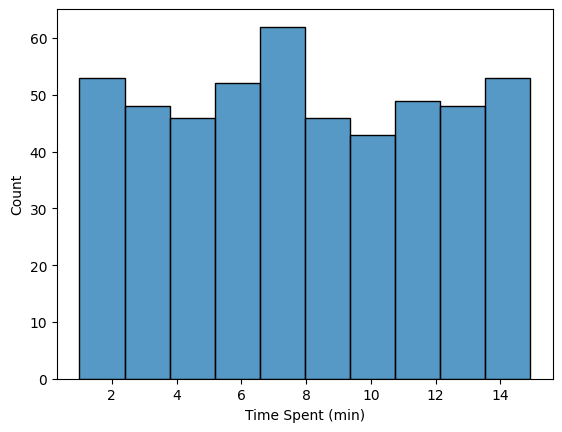

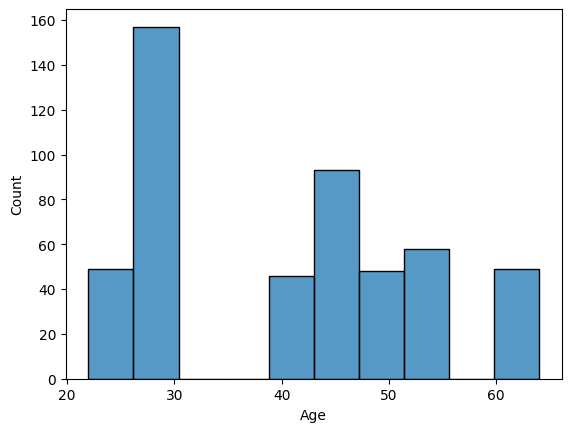

In [7]:
# EDA on numerical data

sns.histplot(data, x = 'Amount')
plt.show()

sns.histplot(data, x = 'Time Spent (min)')
plt.show()

sns.histplot(data, x = 'Age')
plt.show()

Numerical data doesn't look skewed so no log transformation is needed in these columns

Players bet based on their favorite team by far lets look into that more.

In [8]:
data_favorite_team = data[data['Betting Preference']=='Favorite Teams']
data_favorite_team.head()

,User ID,Bet Type,Amount,Outcome,Timestamp,Time Spent (min),Page,Sport,Age,Gender,Betting Preference,Engagement Level
1,User_9,Moneyline,84.83,1,2024-08-04 03:49:16.578821,2.09,Sports Page,Soccer,47,Female,Favorite Teams,High
3,User_6,Moneyline,416.40,0,2024-08-24 11:31:22.578821,3.36,Homepage,Basketball,41,Male,Favorite Teams,Medium
4,User_4,Over/Under,316.87,0,2024-08-18 09:46:03.578821,12.04,Homepage,Football,50,Male,Favorite Teams,Medium
5,User_2,Prop Bet,64.70,1,2024-08-11 02:53:01.578821,9.68,Statistics Page,Hockey,27,Female,Favorite Teams,High
6,User_4,Over/Under,174.37,0,2024-08-04 02:25:20.578821,4.36,Homepage,Football,50,Male,Favorite Teams,Medium


Spread on User ID
User_1    56
User_2    52
User_5    51
User_4    48
User_6    46
User_9    42
Name: count, dtype: int64
---------------------------


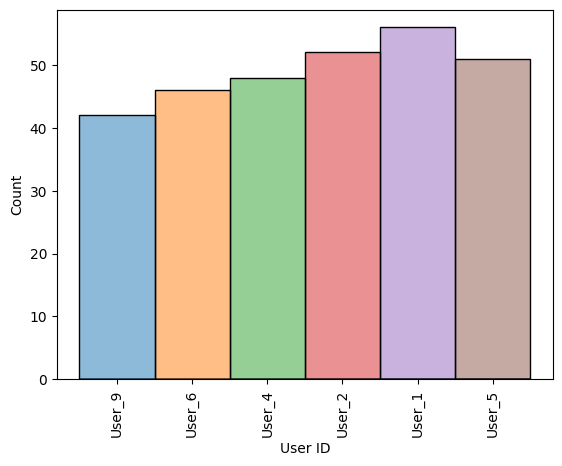

---------------------------
Spread on Bet Type
Moneyline       63
Point Spread    60
Prop Bet        59
Parlay          58
Over/Under      55
Name: count, dtype: int64
---------------------------


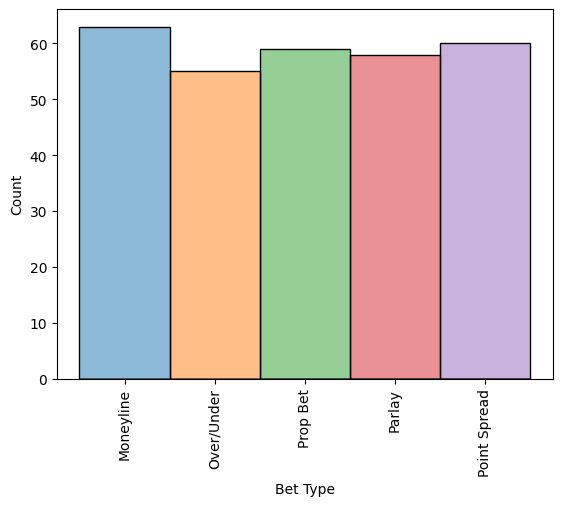

---------------------------
Spread on Sport
Basketball    58
Baseball      54
Football      52
Hockey        51
Soccer        48
Tennis        32
Name: count, dtype: int64
---------------------------


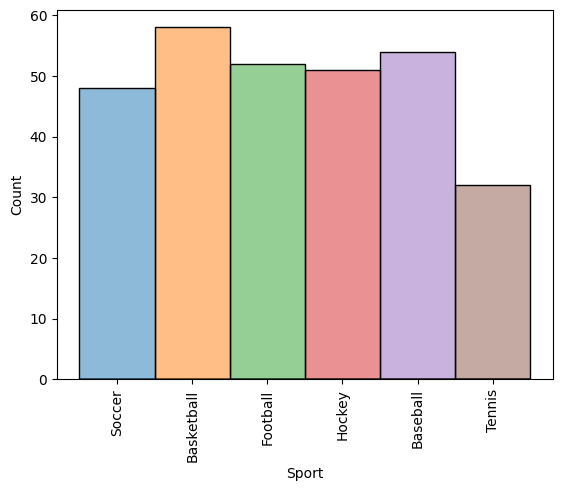

---------------------------
Spread on Gender
Male      201
Female     94
Name: count, dtype: int64
---------------------------


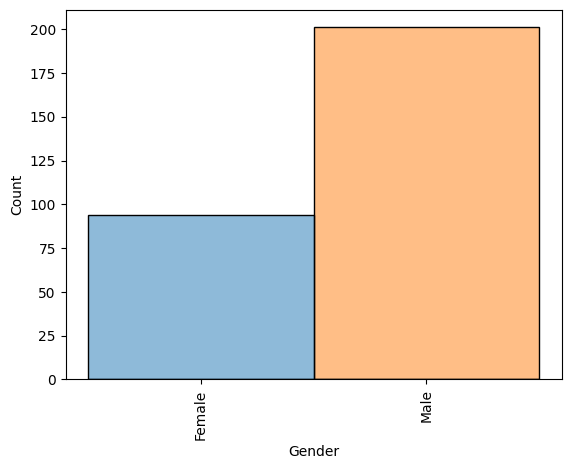

---------------------------
Spread on Engagement Level
High      201
Medium     94
Name: count, dtype: int64
---------------------------


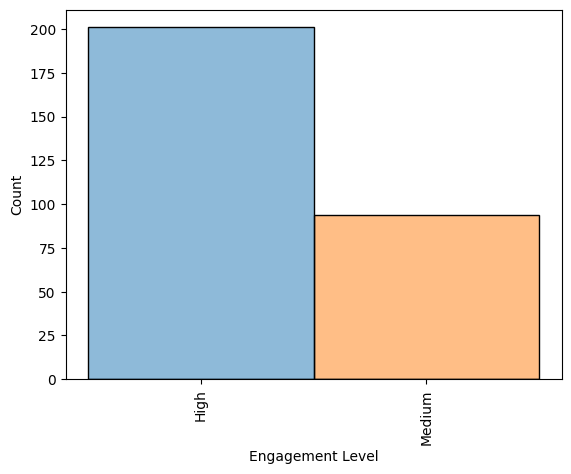

---------------------------


In [9]:
cat_favorite_team = data_favorite_team[['User ID', 'Bet Type', 'Sport', 'Gender', 'Engagement Level']]

for i, col in enumerate(cat_favorite_team.columns):
    print("Spread on", data_favorite_team[col].value_counts())
    print('---------------------------')
    sns.histplot(data_favorite_team, x = col, hue = col, legend=False)
    plt.xticks(rotation=90)
    plt.show()
    print('---------------------------')


- Users 3, 7, and 8 have not placed a bet with due to their favorite team.
- Basketball is the most bet on sport when the preference is the persons favorite team
- Moneyline is the most common type of bet for this. This makes sense since it is the most straitforward bet

In [10]:
# FEATURE ENGINEERING
    #Handling Categorical Values
data_encoded = pd.get_dummies(data, columns = ['Gender', 'Page', 'Sport', 'Betting Preference'])
boolean_columns = data_encoded.select_dtypes(include='bool').columns

data_encoded[boolean_columns] = data_encoded[boolean_columns].astype(int)

In [11]:
data.head()

,User ID,Bet Type,Amount,Outcome,Timestamp,Time Spent (min),Page,Sport,Age,Gender,Betting Preference,Engagement Level
0,User_8,Parlay,32.20,0,2024-08-04 14:56:35.578821,4.72,Bet Slip,Basketball,22,Female,High Risk,Medium
1,User_9,Moneyline,84.83,1,2024-08-04 03:49:16.578821,2.09,Sports Page,Soccer,47,Female,Favorite Teams,High
2,User_10,Parlay,67.35,1,2024-08-04 01:59:38.578821,2.57,Sports Page,Baseball,29,Male,Player Props,Medium
3,User_6,Moneyline,416.40,0,2024-08-24 11:31:22.578821,3.36,Homepage,Basketball,41,Male,Favorite Teams,Medium
4,User_4,Over/Under,316.87,0,2024-08-18 09:46:03.578821,12.04,Homepage,Football,50,Male,Favorite Teams,Medium


In [12]:
# Creating a column for bet success rate
data['Bet Success Rate'] = data.groupby('User ID')['Outcome'].transform(lambda x: x.sum() / x.count())


In [13]:
# Creating a column for Average bet amount

data['Average Bet Amount'] = data.groupby('User ID')['Amount'].transform('mean')


In [14]:
# creating a bet frequency column
data = data.sort_values(by=['User ID', 'Timestamp'])
data['Bet Frequency'] = data.groupby('User ID')['Timestamp'].transform(lambda x: x.diff().mean().total_seconds() / (60 * 60 * 24)*100)
data.head()

,User ID,Bet Type,Amount,Outcome,Timestamp,Time Spent (min),Page,Sport,Age,Gender,Betting Preference,Engagement Level,Bet Success Rate,Average Bet Amount,Bet Frequency
35,User_1,Parlay,321.13,1,2024-07-31 18:34:21.578821,6.32,Sports Page,Tennis,28,Male,Favorite Teams,High,0.5,250.728036,53.949327
332,User_1,Parlay,498.17,0,2024-07-31 21:14:38.578821,14.01,Statistics Page,Baseball,28,Male,Favorite Teams,High,0.5,250.728036,53.949327
88,User_1,Prop Bet,398.63,0,2024-08-02 01:13:14.578821,11.17,Statistics Page,Hockey,28,Male,Favorite Teams,High,0.5,250.728036,53.949327
354,User_1,Moneyline,357.37,0,2024-08-02 07:48:29.578821,11.41,Statistics Page,Hockey,28,Male,Favorite Teams,High,0.5,250.728036,53.949327
93,User_1,Moneyline,494.86,1,2024-08-02 21:46:29.578821,5.55,Statistics Page,Tennis,28,Male,Favorite Teams,High,0.5,250.728036,53.949327


In [15]:
# extracting the hour the bet was placed

data['Hour of Bet'] = pd.to_datetime(data['Timestamp']).dt.hour
data.head()

,User ID,Bet Type,Amount,Outcome,Timestamp,Time Spent (min),Page,Sport,Age,Gender,Betting Preference,Engagement Level,Bet Success Rate,Average Bet Amount,Bet Frequency,Hour of Bet
35,User_1,Parlay,321.13,1,2024-07-31 18:34:21.578821,6.32,Sports Page,Tennis,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,18
332,User_1,Parlay,498.17,0,2024-07-31 21:14:38.578821,14.01,Statistics Page,Baseball,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,21
88,User_1,Prop Bet,398.63,0,2024-08-02 01:13:14.578821,11.17,Statistics Page,Hockey,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,1
354,User_1,Moneyline,357.37,0,2024-08-02 07:48:29.578821,11.41,Statistics Page,Hockey,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,7
93,User_1,Moneyline,494.86,1,2024-08-02 21:46:29.578821,5.55,Statistics Page,Tennis,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,21


In [16]:
# extracting day of week 

data['Day of Week'] = pd.to_datetime(data['Timestamp']).dt.dayofweek
data.head()

,User ID,Bet Type,Amount,Outcome,Timestamp,Time Spent (min),Page,Sport,Age,Gender,Betting Preference,Engagement Level,Bet Success Rate,Average Bet Amount,Bet Frequency,Hour of Bet,Day of Week
35,User_1,Parlay,321.13,1,2024-07-31 18:34:21.578821,6.32,Sports Page,Tennis,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,18,2
332,User_1,Parlay,498.17,0,2024-07-31 21:14:38.578821,14.01,Statistics Page,Baseball,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,21,2
88,User_1,Prop Bet,398.63,0,2024-08-02 01:13:14.578821,11.17,Statistics Page,Hockey,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,1,4
354,User_1,Moneyline,357.37,0,2024-08-02 07:48:29.578821,11.41,Statistics Page,Hockey,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,7,4
93,User_1,Moneyline,494.86,1,2024-08-02 21:46:29.578821,5.55,Statistics Page,Tennis,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,21,4


In [17]:
# creating a column that shows if the bet was placed on a weekend or not

data['Is Weekend'] = data['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

In [18]:
# Caclulating the total amount placed by each user

data['Total Amount Plaved'] = data.groupby('User ID')['Amount'].transform('sum')
data.head()

,User ID,Bet Type,Amount,Outcome,Timestamp,Time Spent (min),Page,Sport,Age,Gender,Betting Preference,Engagement Level,Bet Success Rate,Average Bet Amount,Bet Frequency,Hour of Bet,Day of Week,Is Weekend,Total Amount Plaved
35,User_1,Parlay,321.13,1,2024-07-31 18:34:21.578821,6.32,Sports Page,Tennis,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,18,2,0,14040.77
332,User_1,Parlay,498.17,0,2024-07-31 21:14:38.578821,14.01,Statistics Page,Baseball,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,21,2,0,14040.77
88,User_1,Prop Bet,398.63,0,2024-08-02 01:13:14.578821,11.17,Statistics Page,Hockey,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,1,4,0,14040.77
354,User_1,Moneyline,357.37,0,2024-08-02 07:48:29.578821,11.41,Statistics Page,Hockey,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,7,4,0,14040.77
93,User_1,Moneyline,494.86,1,2024-08-02 21:46:29.578821,5.55,Statistics Page,Tennis,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,21,4,0,14040.77


In [19]:
# Calculating the number of bets placed per sport

data['Bets Per Sport'] = data.groupby(['User ID', 'Sport'])['Sport'].transform('count')
data.head()

,User ID,Bet Type,Amount,Outcome,Timestamp,Time Spent (min),Page,Sport,Age,Gender,Betting Preference,Engagement Level,Bet Success Rate,Average Bet Amount,Bet Frequency,Hour of Bet,Day of Week,Is Weekend,Total Amount Plaved,Bets Per Sport
35,User_1,Parlay,321.13,1,2024-07-31 18:34:21.578821,6.32,Sports Page,Tennis,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,18,2,0,14040.77,6
332,User_1,Parlay,498.17,0,2024-07-31 21:14:38.578821,14.01,Statistics Page,Baseball,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,21,2,0,14040.77,14
88,User_1,Prop Bet,398.63,0,2024-08-02 01:13:14.578821,11.17,Statistics Page,Hockey,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,1,4,0,14040.77,12
354,User_1,Moneyline,357.37,0,2024-08-02 07:48:29.578821,11.41,Statistics Page,Hockey,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,7,4,0,14040.77,12
93,User_1,Moneyline,494.86,1,2024-08-02 21:46:29.578821,5.55,Statistics Page,Tennis,28,Male,Favorite Teams,High,0.5,250.728036,53.949327,21,4,0,14040.77,6


In [20]:
engagement_map = {'Low': 1, 'Medium': 2, 'High': 3}
data['Engagement Level Numeric'] = data['Engagement Level'].map(engagement_map)

In [33]:
# Standardizing data for modeling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Amount', 'Average Bet Amount', 'Bet Frequency', 'Time Spent (min)', 'Age', 'Bets Per Sport', 'Bet Success Rate']] = scaler.fit_transform(data[['Amount', 'Average Bet Amount', 'Bet Frequency', 'Time Spent (min)', 'Age', 'Bets Per Sport', 'Bet Success Rate']])



In [37]:
data.head()

,User ID,Bet Type,Amount,Outcome,Timestamp,Time Spent (min),Page,Sport,Age,Gender,...,Average Bet Amount,Bet Frequency,Hour of Bet,Day of Week,Is Weekend,Total Amount Plaved,Bets Per Sport,Engagement Level Numeric,Amount by Success,Amount by Engagement
35,User_1,Parlay,0.483275,1,2024-07-31 18:34:21.578821,-0.395786,Sports Page,Tennis,-0.963406,Male,...,-0.124445,-1.215239,18,2,0,14040.77,-1.204844,3,-0.104031,1.449824
332,User_1,Parlay,1.738268,0,2024-07-31 21:14:38.578821,1.515490,Statistics Page,Baseball,-0.963406,Male,...,-0.124445,-1.215239,21,2,0,14040.77,1.670679,3,-0.374183,5.214803
88,User_1,Prop Bet,1.032653,0,2024-08-02 01:13:14.578821,0.809635,Statistics Page,Hockey,-0.963406,Male,...,-0.124445,-1.215239,1,4,0,14040.77,0.951798,3,-0.222291,3.097959
354,User_1,Moneyline,0.740171,0,2024-08-02 07:48:29.578821,0.869285,Statistics Page,Hockey,-0.963406,Male,...,-0.124445,-1.215239,7,4,0,14040.77,0.951798,3,-0.159331,2.220513
93,User_1,Moneyline,1.714804,1,2024-08-02 21:46:29.578821,-0.587162,Statistics Page,Tennis,-0.963406,Male,...,-0.124445,-1.215239,21,4,0,14040.77,-1.204844,3,-0.369133,5.144412


In [36]:
# Interaction Features

data['Amount by Success'] = data['Amount'] * data['Bet Success Rate']
data['Amount by Engagement'] = data['Amount'] * data['Engagement Level Numeric']

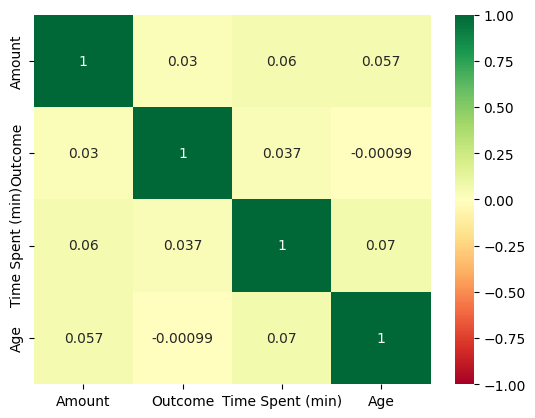

In [18]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = 'RdYlGn', annot=True)
plt.show()

There is no real correlation between these variables

In [40]:
# Calculating Time Since Last Bet

data['Time Since Last Bet'] = data.groupby('User ID')['Timestamp'].transform(lambda x: x.diff().fillna(pd.Timedelta(seconds=0)).dt.total_seconds() / (60 * 60))


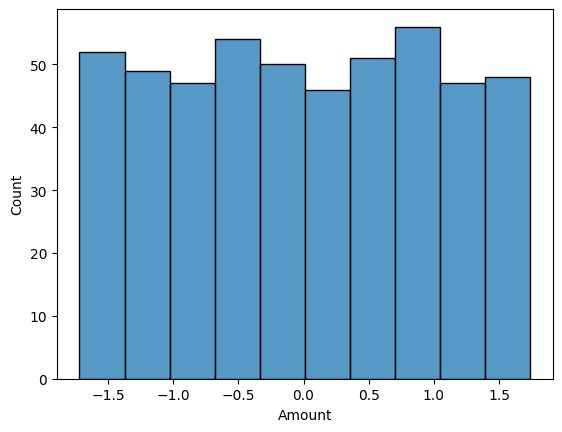

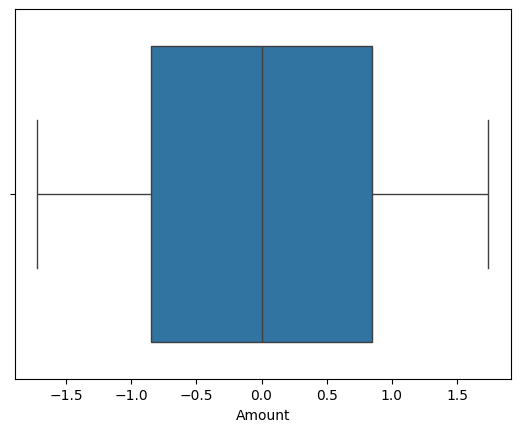

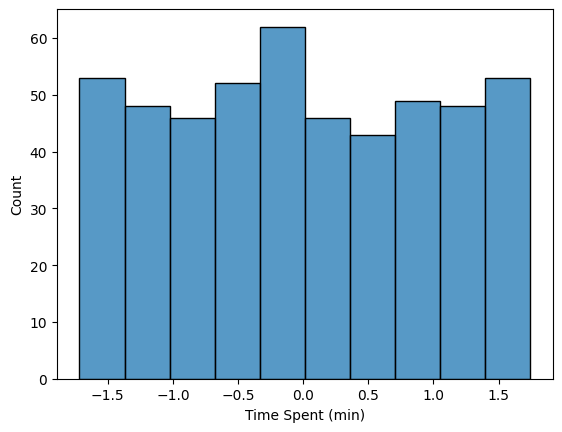

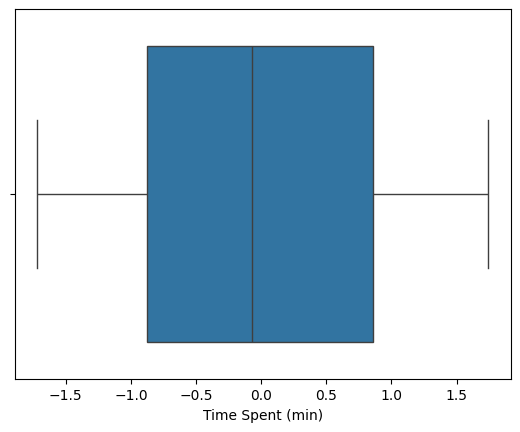

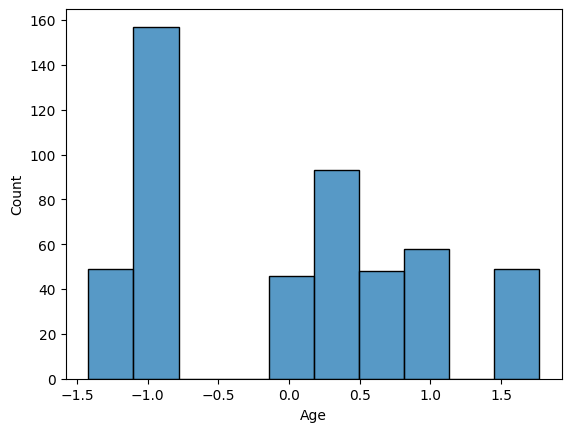

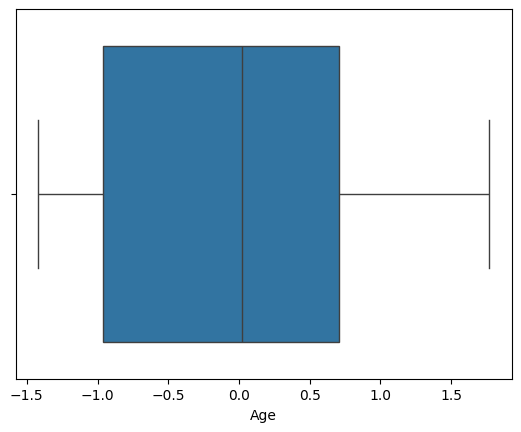

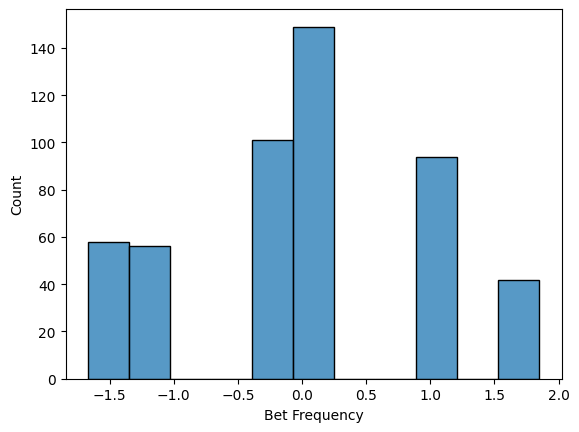

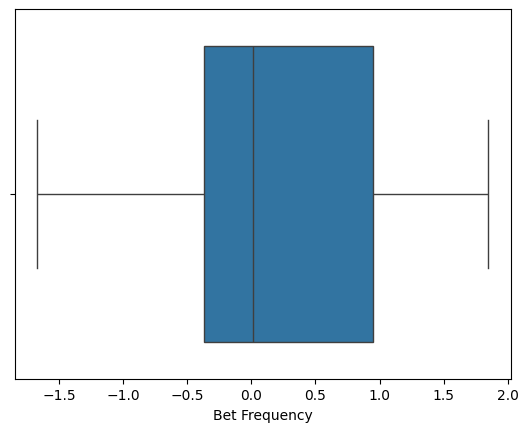

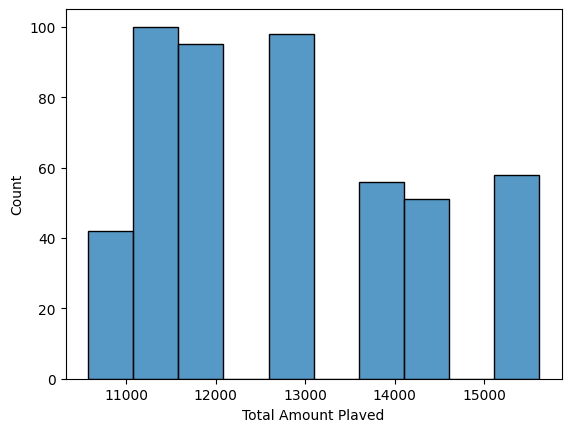

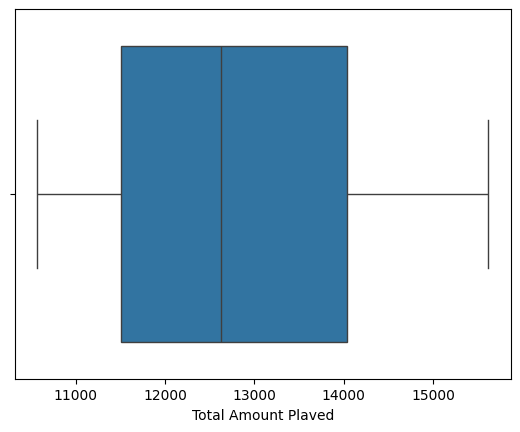

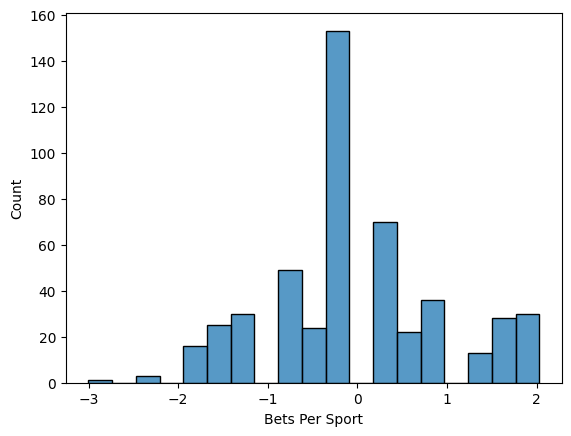

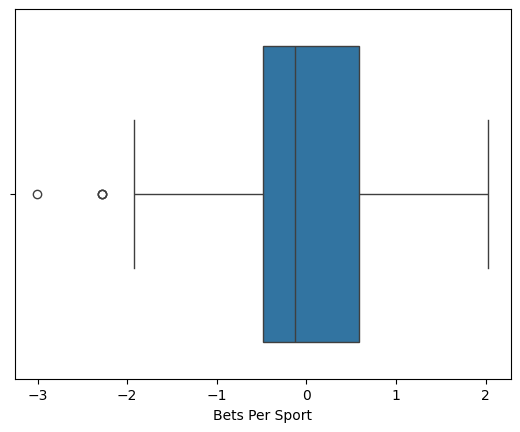

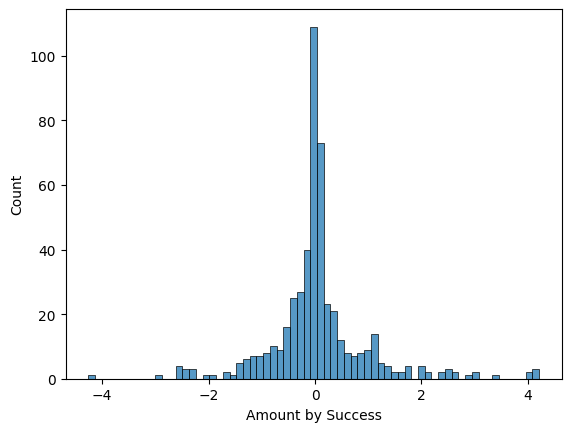

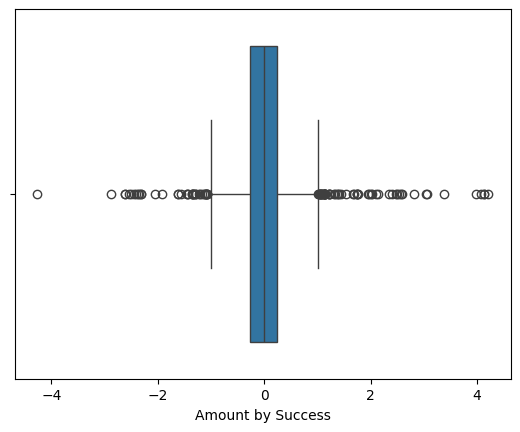

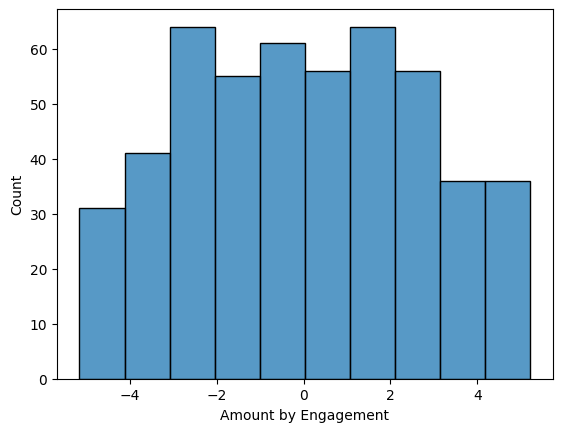

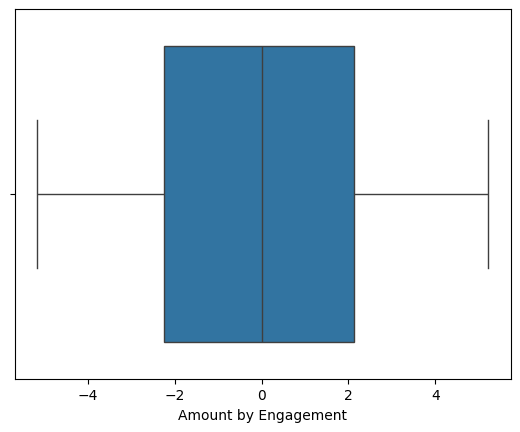

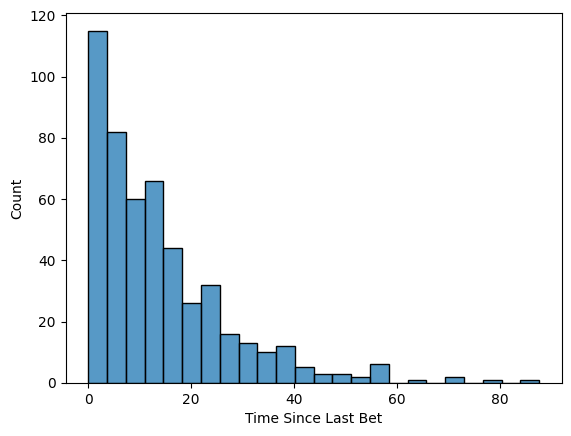

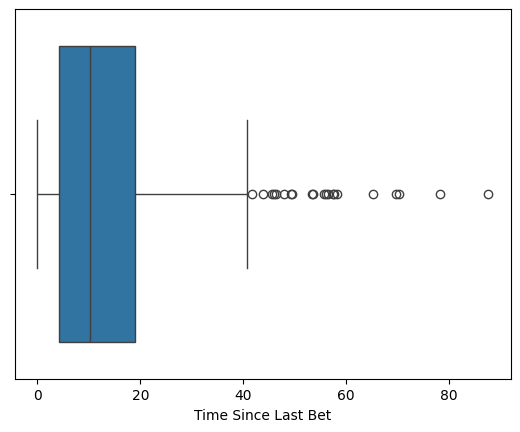

In [45]:
# EDA on Engineered Features

featured_cat = data[['Amount', 'Time Spent (min)', 'Age', 'Bet Frequency', 'Total Amount Plaved', 'Bets Per Sport', 'Amount by Success', 'Amount by Engagement', 'Time Since Last Bet']]

for i, col in enumerate(featured_cat.columns):
    sns.histplot(featured_cat, x = col)
    plt.show()
    sns.boxplot(featured_cat, x = col)
    plt.show()

Time since last bet is heavily right skewed. Will fix that with a log transformation.

In [49]:
# Fixing the skewness of the Time Since Last Bet
    # Log Transformation

data['Log Time Since Last Bet'] = np.log1p(data['Time Since Last Bet'])

    # Standardizing the data
data['Log Time Since Last Bet'] = scaler.fit_transform(data[['Log Time Since Last Bet']])


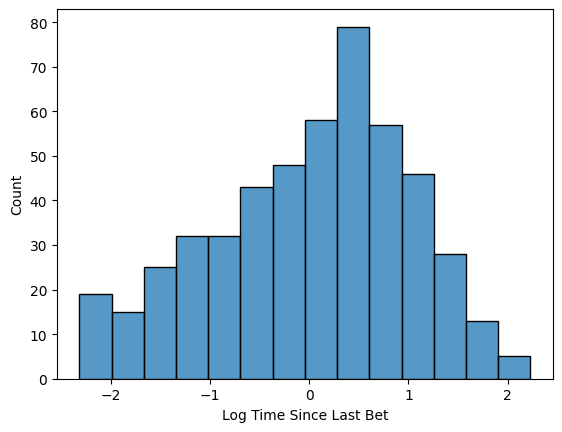

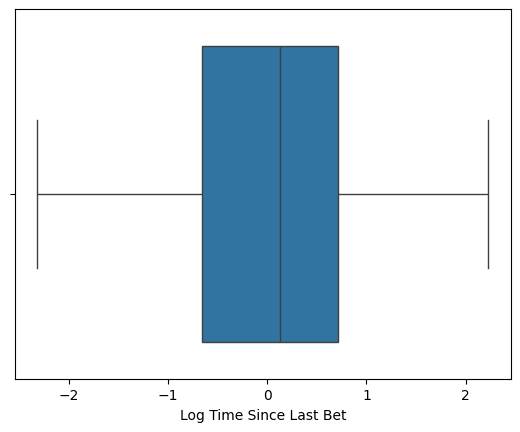

In [50]:
sns.histplot(data, x = 'Log Time Since Last Bet')
plt.show()
sns.boxplot(data, x = 'Log Time Since Last Bet')
plt.show()
             

In [6]:
# Implementing SVD model 

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate

data_svd = data[['User ID', 'Bet Type', 'Outcome']]

# Defining reader with a rating scale (0 = loss, 1 = win)

reader = Reader(rating_scale = (0,1))

# Loading Dataaset into correct format

data_svd_format = Dataset.load_from_df(data_svd, reader)

# Split data into training and test sets

trainset, testset = train_test_split(data_svd_format, test_size=0.25)

# Initialize the SVD algorithm
algo = SVD()

# Train the SVD model on the training data
algo.fit(trainset)

# Make predictions on the test set
predictions = algo.test(testset)

# Evaluate the performance of the model
accuracy = cross_validate(algo, data_svd_format, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print(accuracy)



Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5067  0.5154  0.5352  0.5176  0.5321  0.5214  0.0107  
MAE (testset)     0.4938  0.4983  0.5188  0.5032  0.5178  0.5064  0.0102  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
{'test_rmse': array([0.50665807, 0.51541413, 0.53517312, 0.51762566, 0.53214851]), 'test_mae': array([0.49384532, 0.49828711, 0.51877846, 0.50317837, 0.51780705]), 'fit_time': (0.0013728141784667969, 0.001379251480102539, 0.0013480186462402344, 0.0013339519500732422, 0.0013439655303955078), 'test_time': (0.0003440380096435547, 0.0002338886260986328, 0.00022602081298828125, 0.0002238750457763672, 0.00023508071899414062)}


Model seems to perform well with a low RSME an MAE

In [17]:
data.head()

,User ID,Bet Type,Amount,Outcome,Timestamp,Time Spent (min),Page,Sport,Age,Gender,Betting Preference,Engagement Level
0,User_8,Parlay,32.20,0,2024-08-04 14:56:35.578821,4.72,Bet Slip,Basketball,22,Female,High Risk,Medium
1,User_9,Moneyline,84.83,1,2024-08-04 03:49:16.578821,2.09,Sports Page,Soccer,47,Female,Favorite Teams,High
2,User_10,Parlay,67.35,1,2024-08-04 01:59:38.578821,2.57,Sports Page,Baseball,29,Male,Player Props,Medium
3,User_6,Moneyline,416.40,0,2024-08-24 11:31:22.578821,3.36,Homepage,Basketball,41,Male,Favorite Teams,Medium
4,User_4,Over/Under,316.87,0,2024-08-18 09:46:03.578821,12.04,Homepage,Football,50,Male,Favorite Teams,Medium


In [9]:
# Using the SVD model

user_id = 'User_8'
user_bets = data[data['User ID'] == user_id]['Bet Type'].unique()
# Predict ratings for all bet types the user has interacted with
predictions = []
for bet_type in user_bets:
    pred = algo.predict(user_id, bet_type)
    predictions.append((bet_type, pred.est))

# Sort the predictions by the estimated rating (descending)
predictions.sort(key=lambda x: x[1], reverse=True)

# Recommend the top N bet types
top_n = 5
recommended_bets = predictions[:top_n]

# Display the recommended bets
print(f"Top {top_n} recommended bets for user {user_id}:")
for bet, score in recommended_bets:
    print(f"Bet Type: {bet}, Predicted Rating: {score:.2f}")


Top 5 recommended bets for user User_8:
Bet Type: Moneyline, Predicted Rating: 0.45
Bet Type: Point Spread, Predicted Rating: 0.43
Bet Type: Prop Bet, Predicted Rating: 0.40
Bet Type: Parlay, Predicted Rating: 0.34
Bet Type: Over/Under, Predicted Rating: 0.34


In [10]:
# User ID for whom you want to generate recommendations
user_id = input("Please enter the User ID for whom you want to generate recommendations: ")

# List the bet types the user has already interacted with
user_bets = data[data['User ID'] == user_id]['Bet Type'].unique()

# Create a mapping of Bet Type to Sport
bet_to_sport = data.set_index('Bet Type')['Sport'].to_dict()

# Predict ratings for all bet types the user has interacted with
predictions = []
for bet_type in user_bets:
    pred = algo.predict(user_id, bet_type)
    sport = bet_to_sport.get(bet_type, "Unknown Sport")  # Get the sport, default to "Unknown Sport" if not found
    predictions.append((bet_type, sport, pred.est))

# Sort the predictions by the estimated rating (descending)
predictions.sort(key=lambda x: x[2], reverse=True)

# Recommend the top N bet types
top_n = 5
recommended_bets = predictions[:top_n]

# Display the recommended bets along with their associated sports
print(f"Top {top_n} recommended bets for user {user_id}:")
for bet, sport, score in recommended_bets:
    print(f"Bet Type: {bet}, Sport: {sport}, Predicted Rating: {score:.2f}")



Top 5 recommended bets for user User_7:
Bet Type: Point Spread, Sport: Football, Predicted Rating: 0.67
Bet Type: Over/Under, Sport: Hockey, Predicted Rating: 0.58
Bet Type: Parlay, Sport: Soccer, Predicted Rating: 0.52
Bet Type: Prop Bet, Sport: Hockey, Predicted Rating: 0.46
Bet Type: Moneyline, Sport: Basketball, Predicted Rating: 0.31


In [13]:
# User ID for whom you want to generate recommendations
user_id = input("Please enter the User ID for whom you want to generate recommendations: ")

# List the bet types the user has already interacted with
user_bets = data[data['User ID'] == user_id]['Bet Type'].unique()

# Create a mapping of Bet Type to Sport
bet_to_sport = data.set_index('Bet Type')['Sport'].to_dict()

# Predict ratings for all bet types the user has interacted with
predictions = []
for bet_type in user_bets:
    pred = algo.predict(user_id, bet_type)
    sport = bet_to_sport.get(bet_type, "Unknown Sport")  # Get the sport, default to "Unknown Sport" if not found
    predictions.append((bet_type, sport, pred.est))

# Sort the predictions by the estimated rating (descending)
predictions.sort(key=lambda x: x[2], reverse=True)

# Recommend the top N bet types
top_n = 5
recommended_bets = predictions[:top_n]

# Display the recommended bets along with their associated sports
print(f"Top {top_n} recommended bets for user {user_id}:")
for bet, sport, score in recommended_bets:
    print(f"Bet Type: {bet}, Sport: {sport}, Predicted Rating: {score:.2f}")

Top 5 recommended bets for user User_2:
Bet Type: Prop Bet, Sport: Hockey, Predicted Rating: 0.60
Bet Type: Point Spread, Sport: Football, Predicted Rating: 0.55
Bet Type: Over/Under, Sport: Hockey, Predicted Rating: 0.50
Bet Type: Parlay, Sport: Soccer, Predicted Rating: 0.42
Bet Type: Moneyline, Sport: Basketball, Predicted Rating: 0.33


In [14]:
# User ID for whom you want to generate recommendations
user_id = input("Please enter the User ID for whom you want to generate recommendations: ")

# List the bet types the user has already interacted with
user_bets = data[data['User ID'] == user_id]['Bet Type'].unique()

# Create a mapping of Bet Type to Sport
bet_to_sport = data.set_index('Bet Type')['Sport'].to_dict()

# Predict ratings for all bet types the user has interacted with
predictions = []
for bet_type in user_bets:
    pred = algo.predict(user_id, bet_type)
    sport = bet_to_sport.get(bet_type, "Unknown Sport")  # Get the sport, default to "Unknown Sport" if not found
    predictions.append((bet_type, sport, pred.est))

# Sort the predictions by the estimated rating (descending)
predictions.sort(key=lambda x: x[2], reverse=True)

# Recommend the top N bet types
top_n = 5
recommended_bets = predictions[:top_n]

# Display the recommended bets along with their associated sports
print(f"Top {top_n} recommended bets for user {user_id}:")
for bet, sport, score in recommended_bets:
    print(f"Bet Type: {bet}, Sport: {sport}, Predicted Rating: {score:.2f}")

Top 5 recommended bets for user User_5:
Bet Type: Moneyline, Sport: Basketball, Predicted Rating: 0.77
Bet Type: Prop Bet, Sport: Hockey, Predicted Rating: 0.63
Bet Type: Over/Under, Sport: Hockey, Predicted Rating: 0.42
Bet Type: Parlay, Sport: Soccer, Predicted Rating: 0.41
Bet Type: Point Spread, Sport: Football, Predicted Rating: 0.39


# Final Thoughts

### Business Objective:
The original business objective was to develop a system that delivers personalized betting recommendations to users. The system would analyze each user’s historical betting behavior and preferences. This could significantly enhance user engagement and satisfaction by tailoring the betting experience to individual preferences, much like how Netflix recommends movies and shows to its users.

### Approach Summary:
To achieve the goal of providing personalized betting recommendations, I employed a collaborative filtering approach, specifically using the Singular Value Decomposition (SVD) model. The project began with the collection, feature engineering, and general EDA of the data, which included features such as user IDs, bet types, amounts wagered, time spent on the app, and the outcomes of their bets.

This project implemented a personalized betting recommendation system using the SVD (Singular Value Decomposition) model. The process begins by prompting the user to enter their User ID, ensuring that recommendations are tailored to each individual.

The system first identifies the bet types the user has previously interacted with, using this historical data as the foundation for the recommendations. It then maps each bet type to its associated sport, adding contextual relevance to the suggestions.

The SVD model predicts a rating for each bet type, indicating the user’s likely interest or success. These predictions are sorted, and the top-rated bet types are recommended to the user, along with their associated sports and predicted ratings.

This approach effectively combines user-specific data with contextual information to deliver personalized and relevant betting recommendations.

The trained SVD model was then evaluated using cross-validation techniques, specifically calculating RMSE and MAE to assess its accuracy. After calcualting these measures, the RSME and MAE were low ensuring that the model was performing well.

### Key Findings and Insights

The implementation of the SVD-based collaborative filtering model yielded several important insights into user behavior and the effectiveness of personalized recommendations on the platform. One of the most significant findings was the model’s ability to accurately predict user preferences for different bet types, as evidenced by the relatively low Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) values across multiple cross-validation folds. These metrics indicated that the model could reliably estimate the likelihood of a user engaging with and potentially succeeding in specific betting scenarios. By aligning recommendations with both the user’s historical behavior and the specific context of the bet, the system was able to provide more tailored and relevant suggestions. This approach not only increased the accuracy of predictions but also enhanced the overall user experience by offering bet types that aligned closely with individual preferences.

By consistently providing users with bet types that they are more likely to enjoy or succeed with, the platform can encourage longer sessions, more frequent betting, and ultimately, higher lifetime value per user. These findings underscore the importance of personalization in maintaining a competitive edge in the sports betting industry.

### Future Work
While the current implementation of the SVD-based collaborative filtering model has shown promising results in predicting user preferences and enhancing engagement on the platform, there are several avenues for future work that could further improve the system's performance and impact.

One potential area for improvement is the exploration of more advanced recommendation algorithms, such as Wide & Deep Learning models or Factorization Machines. These models can integrate a wider range of features, including demographic data, time of day, and historical betting trends, to provide even more personalized and context-aware recommendations.

Additionally, the current model primarily focuses on predicting user preferences based on past interactions. To further enhance the recommendation system, future work could explore the integration of real-time data streams and dynamic user modeling. By continuously updating user profiles and preferences based on real-time interactions, the system could provide more timely and relevant recommendations, adapting to changes in user behavior and market conditions.

Lastly, A/B testing and user feedback loops could be implemented to empirically validate the effectiveness of the recommendations. By testing different versions of the recommendation algorithm with live users and gathering feedback, the system can be fine-tuned to better meet user needs and preferences.







